In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.model_selection import cross_val_score
from scipy.stats import zscore


In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [6]:
plt.rcParams['figure.figsize']=('10,5')

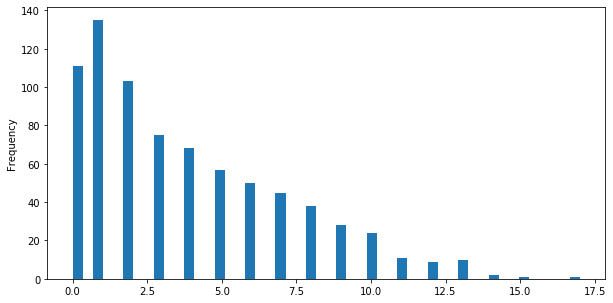

In [7]:
df['Pregnancies'].plot.hist(bins=50)

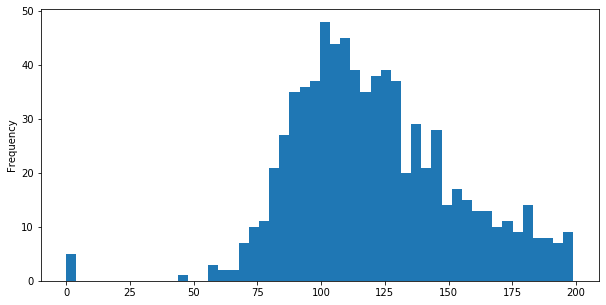

In [8]:
df['Glucose'].plot.hist(bins=50)

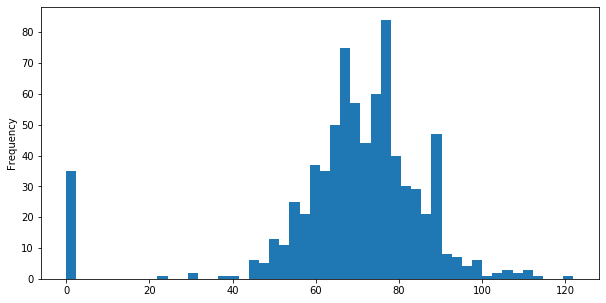

In [9]:
df['BloodPressure'].plot.hist(bins=50)

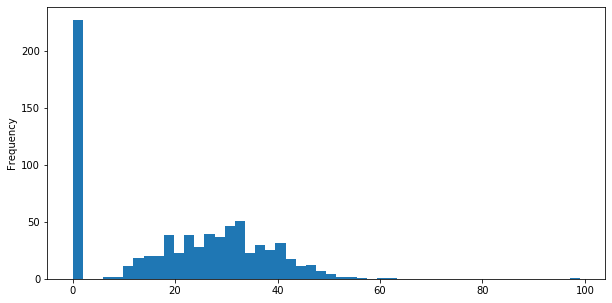

In [10]:
df['SkinThickness'].plot.hist(bins=50)

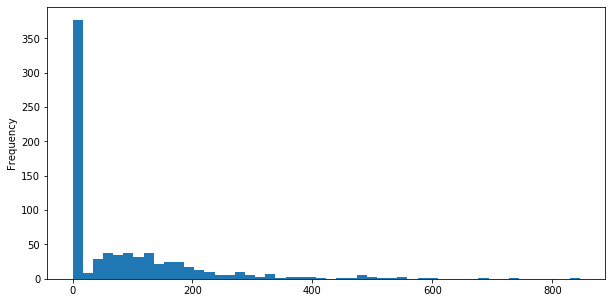

In [11]:
df['Insulin'].plot.hist(bins=50)

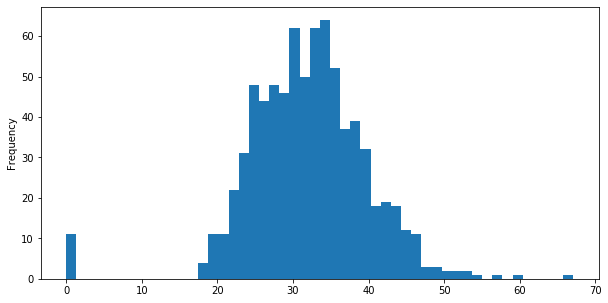

In [12]:
df['BMI'].plot.hist(bins=50)

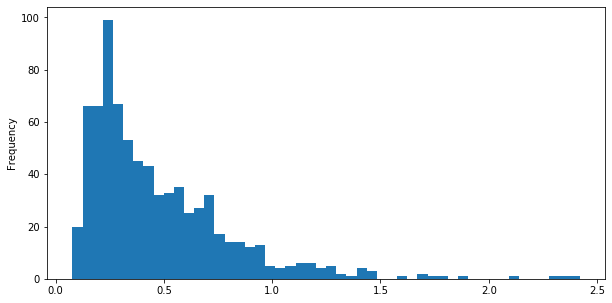

In [13]:
df['DiabetesPedigreeFunction'].plot.hist(bins=50)

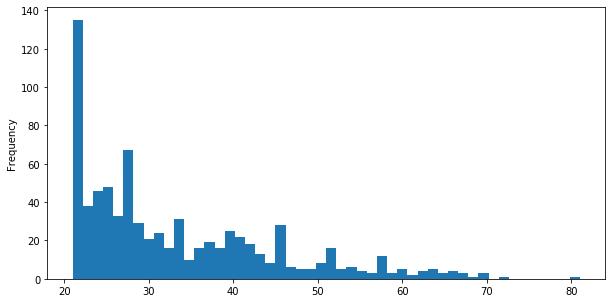

In [14]:
df['Age'].plot.hist(bins=50)

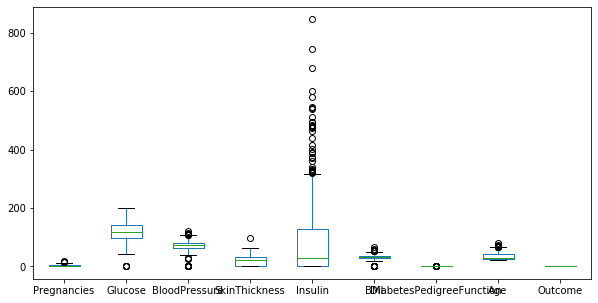

In [15]:
df.plot.box()

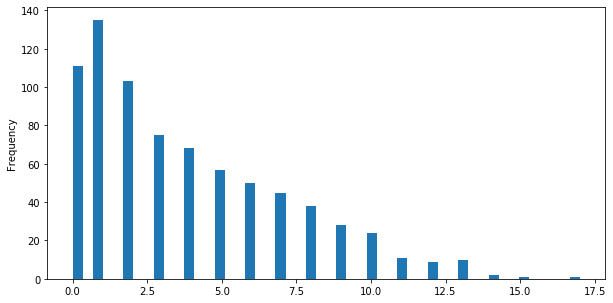

In [16]:
df['Pregnancies'].plot.hist(bins=50)

In [17]:
df.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [18]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
df.shape

(768, 9)

In [20]:
df['SkinThickness'].replace(0,np.nan,inplace=True)

In [21]:
df.dropna(inplace=True)

In [22]:
df.shape

(541, 9)

In [23]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,3.512015,119.822551,71.197782,29.153420,113.282810,32.774122,0.504850,31.558226,0.332717
std,3.324759,32.894640,13.007678,10.476982,122.735833,7.144264,0.346639,10.743768,0.471622
min,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.085000,21.000000,0.000000
25%,1.000000,97.000000,64.000000,22.000000,0.000000,27.800000,0.259000,23.000000,0.000000
50%,2.000000,115.000000,72.000000,29.000000,90.000000,32.800000,0.417000,28.000000,0.000000
75%,5.000000,140.000000,80.000000,36.000000,165.000000,36.900000,0.660000,38.000000,1.000000
max,17.000000,199.000000,110.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [24]:
df.skew()

Pregnancies                 1.153079
Glucose                     0.146618
BloodPressure              -0.560939
SkinThickness               0.690619
Insulin                     1.948785
BMI                         0.242950
DiabetesPedigreeFunction    1.903526
Age                         1.269905
Outcome                     0.712025
dtype: float64

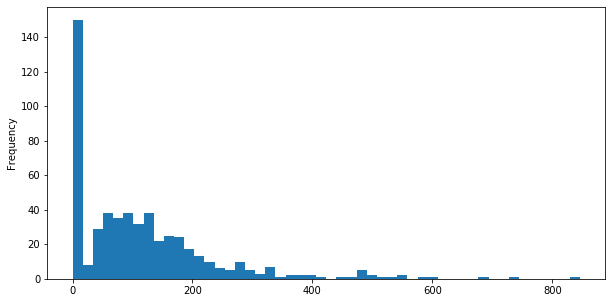

In [25]:
df['Insulin'].plot.hist(bins=50)

In [26]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.126454,0.168720,0.100239,-0.006768,0.036679,0.003539,0.644686,0.264353
Glucose,0.126454,1.000000,0.209451,0.211354,0.459668,0.227207,0.162772,0.271174,0.464691
BloodPressure,0.168720,0.209451,1.000000,0.218918,0.027754,0.278021,-0.003394,0.321633,0.167353
SkinThickness,0.100239,0.211354,0.218918,1.000000,0.126423,0.631959,0.115016,0.166816,0.259491
Insulin,-0.006768,0.459668,0.027754,0.126423,1.000000,0.190051,0.147961,0.083271,0.207919
BMI,0.036679,0.227207,0.278021,0.631959,0.190051,1.000000,0.113142,0.095034,0.308143
DiabetesPedigreeFunction,0.003539,0.162772,-0.003394,0.115016,0.147961,0.113142,1.000000,0.066834,0.225474
Age,0.644686,0.271174,0.321633,0.166816,0.083271,0.095034,0.066834,1.000000,0.323999
Outcome,0.264353,0.464691,0.167353,0.259491,0.207919,0.308143,0.225474,0.323999,1.000000


In [27]:
lr=LogisticRegression()
from sklearn.metrics import r2_score

In [104]:
x=df.iloc[:,0:-1]

In [105]:
y=df.iloc[:,-1].values.reshape(-1,1)

In [106]:
x.shape

(541, 8)

In [107]:
y.shape

(541, 1)

In [108]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [109]:
lr.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [110]:
lr.score(xtrain,ytrain)

0.8049382716049382

In [111]:
pred=lr.predict(xtest)

In [112]:
accuracy_score(pred,ytest)

0.6764705882352942

In [113]:
print(classification_report(pred,ytest))

              precision    recall  f1-score   support

           0       0.92      0.68      0.78       114
           1       0.29      0.68      0.41        22

    accuracy                           0.68       136
   macro avg       0.60      0.68      0.59       136
weighted avg       0.82      0.68      0.72       136



In [114]:
confusion_matrix(pred,ytest)

array([[77, 37],
       [ 7, 15]], dtype=int64)

In [115]:
lr.coef_

array([[ 1.21930551e-01,  2.81529534e-02, -3.47234751e-02,
         1.30009450e-02, -4.83942967e-04,  3.84790962e-02,
         8.49407201e-01,  1.27213832e-02]])

In [116]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [149]:
rfr=RandomForestClassifier(n_estimators=200)

In [150]:
rfr.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [151]:
rfr.score(xtrain,ytrain)

1.0

In [152]:
pred_rfr=rfr.predict(xtest)

In [153]:
accuracy_score(pred_rfr,ytest)

0.7647058823529411

In [154]:
imp=rfr.feature_importances_

In [155]:
cols=x.columns

In [156]:
imp_feature=pd.DataFrame({'imp':imp,'features':cols})

In [157]:
imp_feature.sort_values('imp')

,imp,features
2,0.078812,BloodPressure
3,0.081563,SkinThickness
0,0.088863,Pregnancies
4,0.102521,Insulin
7,0.128850,Age
6,0.135459,DiabetesPedigreeFunction
5,0.138404,BMI
1,0.245528,Glucose


In [158]:
from sklearn.model_selection import cross_val_score

In [159]:
cv=cross_val_score(rfr,x,y,cv=15,scoring='accuracy')

In [160]:
cv.mean()

0.7856356356356355

In [161]:
cv.std()*100

8.375582404277395

In [130]:
dtc,svm,knn=DecisionTreeClassifier(criterion='entropy'),SVC(),KNeighborsClassifier(20)

In [131]:
models=[dtc,svm,knn]

In [132]:
for m in models:
    m.fit(xtrain,ytrain)
    m.score(xtrain,ytrain)
    pred_m=m.predict(xtest)
    accuracy=accuracy_score(pred_m,ytest)
    print('accuracy', accuracy)
    

accuracy 0.7794117647058824
accuracy 0.6176470588235294
accuracy 0.7352941176470589


In [133]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [134]:
pred_dtc=svm.predict(xtest)

In [135]:
cv=cross_val_score(dtc,x,y,cv=15,scoring='accuracy')

In [136]:
cv.mean()

0.7098598598598598

In [138]:
cv.std()

0.07550819341673355

In [162]:
ada=AdaBoostClassifier(base_estimator=rfr,n_estimators=100)

In [163]:
ada.fit(xtrain,ytrain)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=200,
                        

In [164]:
ada.score(xtrain,ytrain)

1.0

In [165]:
pred_ada=ada.predict(xtest)

In [166]:
accuracy_score(pred_ada,ytest)

0.7794117647058824

In [168]:
cvr=cross_val_score(rfr,x,y,cv=15,scoring='accuracy')

In [169]:
cvr.mean()

0.7727227227227227

In [171]:
cvr.std()*100

8.409993177315888

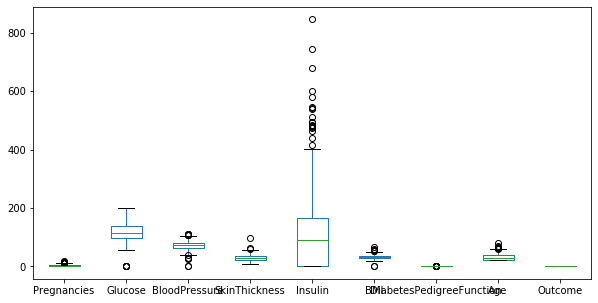

In [172]:
df.plot.box()

In [193]:
for m in models:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred_m=m.predict(x_test)
    accuracy=accuracy_score(pred_m,y_test)
    print('accuracy', accuracy)

accuracy 0.6544117647058824
accuracy 0.6985294117647058
accuracy 0.7573529411764706


In [194]:
pima_model=pickle.dumps(cvr)